# Author: Deepika Chinnala

# PROBLEM STATEMENT:

###  From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# K-Means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data i.e., data without defined categories or groups. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided

The steps are broadly:

1) Read and understand the data

2) Clean the data

3) Prepare the data for modelling

4) Modelling

5) Final analysis and reco

# Step 1: Reading and Understanding the Data



#### Let us first import NumPy and Pandas and read the dataset

In [3]:
#Importing the required libraries for reading and visualising the data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
#importing the pandas_profile
%matplotlib inline

In [4]:
#Suppress the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Reading the dataset
df = pd.read_csv("C:/Users/Deepika/Downloads/Iris.csv")
#Reading the top 5 rows using head()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Inspect the various aspects of the dataframe

In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#checking the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### As we can see from the above code, there are no missing values

# Step 2: Visualising the Data


#### Let's now spend some time doing what is arguably the most important step - understanding the data.

#### We'll visualise our data using matplotlib and seaborn.

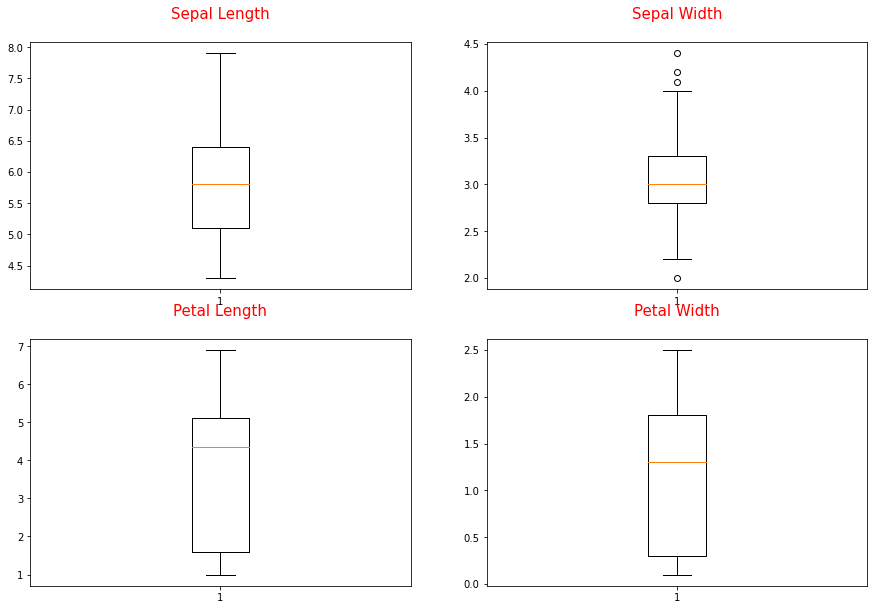

In [10]:
# Checking if any ouliers in the data by plotting the box plot

plt.figure(figsize=(15,10))


plt.subplot(2,2,1)
plt.boxplot(df['SepalLengthCm'])
plt.title("Sepal Length\n",fontdict={'fontsize': 15,'fontweight': 5,'color': 'Red'})

plt.subplot(2,2,2)
plt.boxplot(df['SepalWidthCm'])
plt.title("Sepal Width\n", fontdict={'fontsize': 15,'fontweight': 10,'color': 'Red'})

plt.subplot(2,2,3)
plt.boxplot(df['PetalLengthCm'])
plt.title("Petal Length\n" ,fontdict={'fontsize': 15,'fontweight': 5,'color': 'Red'})

plt.subplot(2,2,4)
plt.boxplot(df['PetalWidthCm'])
plt.title("Petal Width\n", fontdict={'fontsize': 15,'fontweight': 5,'color': 'Red'})

plt.show()


##### There are significant outliers in the data

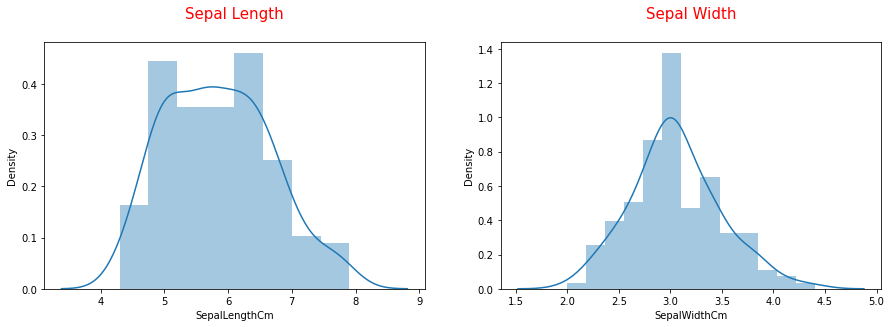

In [11]:
#The distribution of the variables is plotted using the distplot

plt.figure(figsize=(15,10))


plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'])
plt.title("Sepal Length\n",fontdict={'fontsize': 15,'fontweight': 5,'color': 'Red'})

plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'])
plt.title("Sepal Width\n", fontdict={'fontsize': 15,'fontweight': 10,'color': 'Red'})


plt.show()


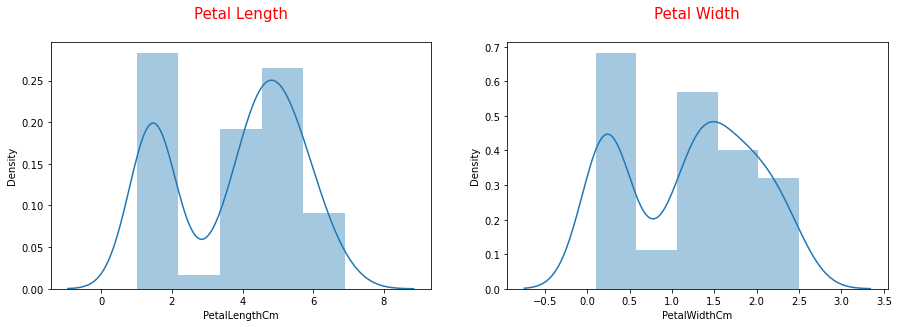

In [12]:
plt.figure(figsize=(15,10))


plt.subplot(2,2,1)
sns.distplot(df['PetalLengthCm'])
plt.title("Petal Length\n",fontdict={'fontsize': 15,'fontweight': 5,'color': 'Red'})

plt.subplot(2,2,2)
sns.distplot(df['PetalWidthCm'])
plt.title("Petal Width\n", fontdict={'fontsize': 15,'fontweight': 10,'color': 'Red'})


plt.show()


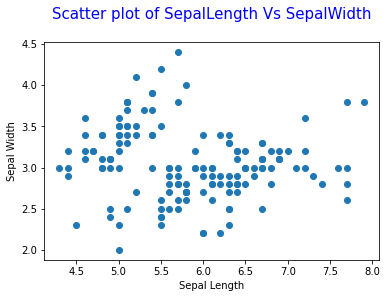

In [13]:
#Scatter plot between Sepal Length and Sepal Width

plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.title("Scatter plot of SepalLength Vs SepalWidth\n",fontdict={'fontsize': 15,'fontweight': 5,'color': 'Blue'})
plt.xlabel("Sepal Length",fontdict={'fontsize': 10,'fontweight': 5,'color': 'Black'})
plt.ylabel("Sepal Width",fontdict={'fontsize': 10,'fontweight': 5,'color': 'Black'})
plt.show()

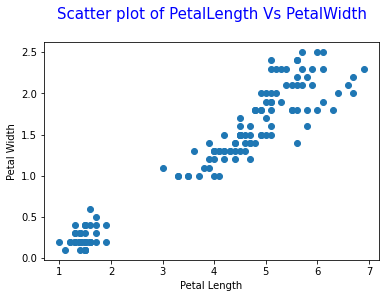

In [14]:
# Scatter plot between Petal Length and Petal Width

plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.title("Scatter plot of PetalLength Vs PetalWidth\n",fontdict={'fontsize': 15,'fontweight': 5,'color': 'Blue'})
plt.xlabel("Petal Length",fontdict={'fontsize': 10,'fontweight': 5,'color': 'Black'})
plt.ylabel("Petal Width",fontdict={'fontsize': 10,'fontweight': 5,'color': 'Black'})
plt.show()

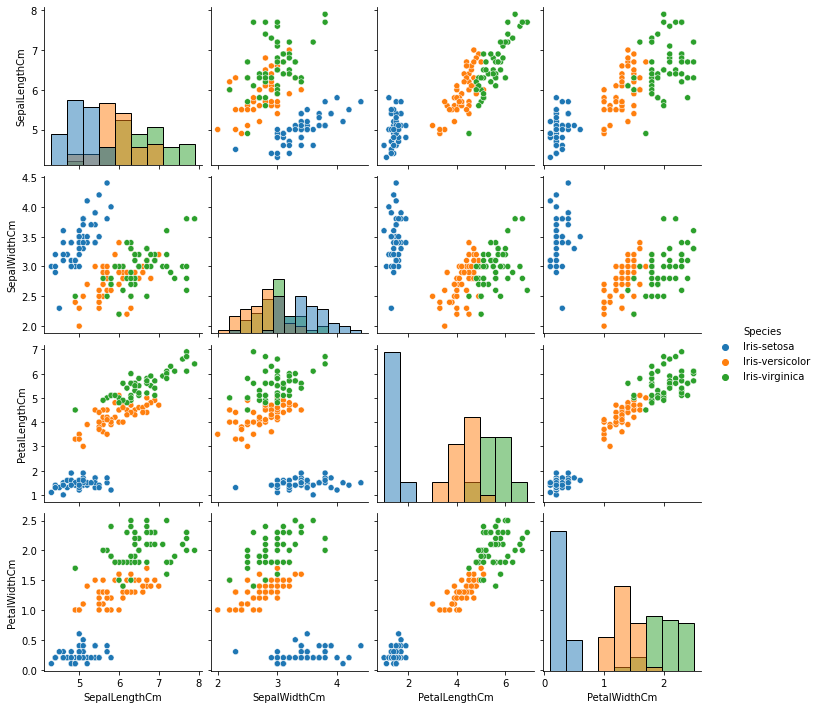

In [15]:
sns.pairplot(df,hue="Species",vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],diag_kind="hist")
plt.show()

# Creating new data set for clustering

#### As, we need to predict the optimum number of clusters we need only 4 variables to predict

In [16]:
df_cluster = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [17]:
df_cluster.shape

(150, 4)

# Re-scaling the variables

In [18]:
#Importing the library for scaling using Standard Scaler
import sklearn
from sklearn.preprocessing import StandardScaler

In [19]:
# instantiate
scaler = StandardScaler()

In [20]:
# fit_transform
df_scaled = scaler.fit_transform(df_cluster)
df_scaled.shape

(150, 4)

In [21]:
df_new_scaled = pd.DataFrame(df_scaled)

In [22]:
df_new_scaled.columns = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

In [23]:
df_new_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# Hopkins Statistics:

#### The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

#### If the value is between {0.01, ...,0.3}, the data is regularly spaced.

#### If the value is around 0.5, it is random.

#### If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [24]:
#Hopkins Statistic code

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
import pandas as pd
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
hopkins(df_new_scaled)

0.8625549469412951

#### The value is 0.84 which is in between 0.7 to 0.99 i.e. the data has high tendency to cluster

# Modelling

In [26]:
#Importing the required library for Kmeans
from sklearn.cluster import KMeans

In [27]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(df_new_scaled)

KMeans(max_iter=50, n_clusters=4)

In [28]:
kmeans.labels_

array([2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3,
       3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3,
       3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1])

# Finding the Optimal Number of Clusters


# SSD

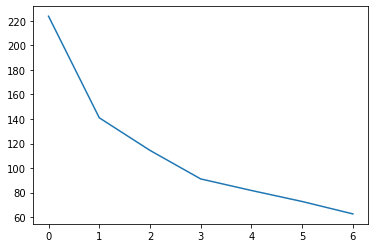

In [29]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_new_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

# Silhouette Analysis

# silhouette score=𝑝−𝑞𝑚𝑎𝑥(𝑝,𝑞)
 
𝑝  is the mean distance to the points in the nearest cluster that the data point is not a part of

𝑞  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [30]:
#Importing the silhouette library
from sklearn.metrics import silhouette_score

In [31]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_new_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_new_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.580184463257396
For n_clusters=3, the silhouette score is 0.4589717867018717
For n_clusters=4, the silhouette score is 0.39785665098541767
For n_clusters=5, the silhouette score is 0.3457900843614749
For n_clusters=6, the silhouette score is 0.32680471796077315
For n_clusters=7, the silhouette score is 0.3259903612369146
For n_clusters=8, the silhouette score is 0.3316962301889518


In [32]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_new_scaled)

KMeans(max_iter=50, n_clusters=3)

In [33]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [34]:
# assign the label
df_cluster['cluster_id'] = kmeans.labels_
df_cluster.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


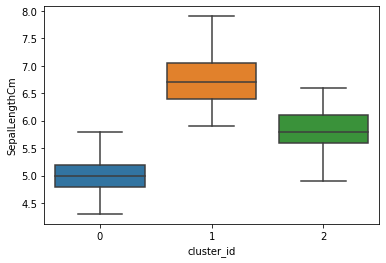

In [35]:
# Plotting the new variable with the previous featured variables
sns.boxplot(x="cluster_id",y="SepalLengthCm",data=df_cluster)
plt.show()

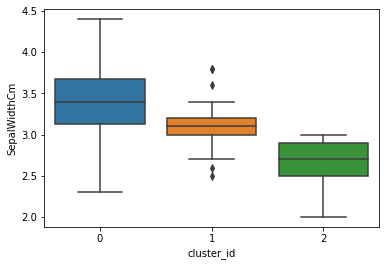

In [36]:
sns.boxplot(x="cluster_id",y="SepalWidthCm",data=df_cluster)
plt.show()

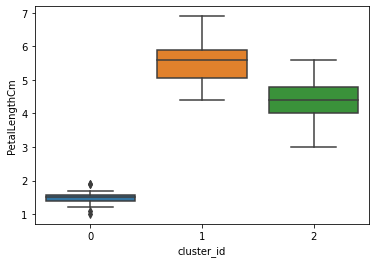

In [37]:
sns.boxplot(x="cluster_id",y="PetalLengthCm",data=df_cluster)
plt.show()

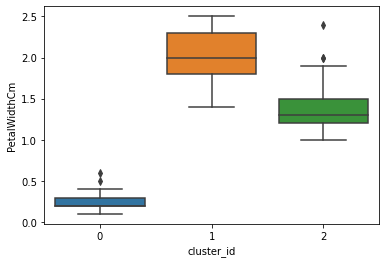

In [38]:
sns.boxplot(x="cluster_id",y="PetalWidthCm",data=df_cluster)
plt.show()

###  The given data, forms 3 clusters. They are:-

#### Cluster 0: High SepalWidth, Moderate SepalLength, Low PetalLength and Low PetalWidth
#### Cluster 1: High Petal Length and High Petal Width, Moderate SepalLength and Low SepalWidth
#### Cluster 2: High PetalWidth, High PetalLength, Moderate SepalWidth and High SepalLength

# Hierarichal Clustering

In [39]:
#Importing the libraries
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

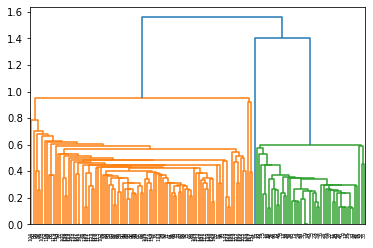

In [40]:
# single linkage
mergings = linkage(df_new_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

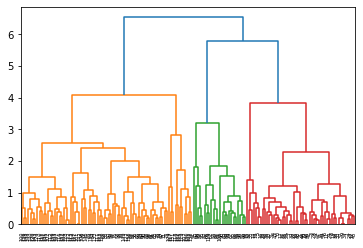

In [41]:
# complete linkage
mergings = linkage(df_new_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [42]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
# assign cluster labels
df_cluster['cluster_labels'] = cluster_labels
df_cluster.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_id,cluster_labels
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


<AxesSubplot:xlabel='cluster_labels', ylabel='SepalLengthCm'>

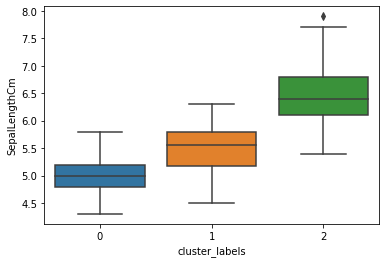

In [44]:
# plots
sns.boxplot(x='cluster_labels', y='SepalLengthCm', data=df_cluster)

<AxesSubplot:xlabel='cluster_labels', ylabel='SepalWidthCm'>

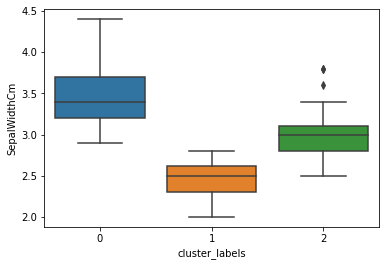

In [45]:
# plots
sns.boxplot(x='cluster_labels', y='SepalWidthCm', data=df_cluster)

<AxesSubplot:xlabel='cluster_labels', ylabel='PetalLengthCm'>

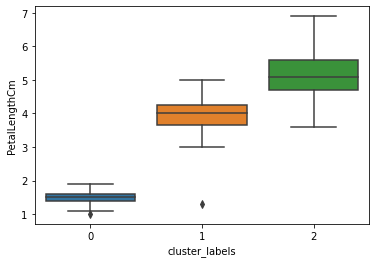

In [46]:
# plots
sns.boxplot(x='cluster_labels', y='PetalLengthCm', data=df_cluster)

<AxesSubplot:xlabel='cluster_labels', ylabel='PetalWidthCm'>

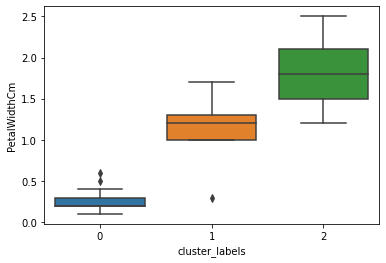

In [47]:
# plots
sns.boxplot(x='cluster_labels', y='PetalWidthCm', data=df_cluster)

The given data, forms 3 clusters. They are:-

Cluster 0: High SepalWidth, Moderate SepalLength, Low PetalLength and Low PetalWidth

Cluster 1: High Petal Length and High Petal Width, Moderate SepalLength and Low SepalWidth

Cluster 2: High PetalWidth, High PetalLength, Moderate SepalWidth and High SepalLength

# Thank you

# Happy Coding!